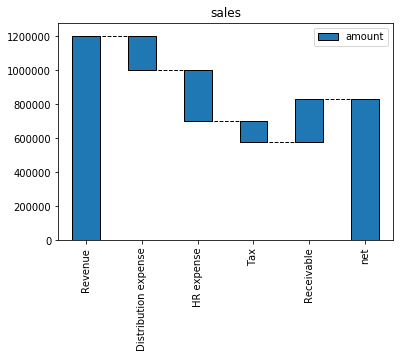

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

index = ['Revenue', 'Distribution expense', 'HR expense', 'Tax', 'Receivable']
mydata = {'amount':[1200000, -200000, -300000, -1200000*0.1, 250000]}
df = pd.DataFrame(data=mydata, index=index)
dfcumsum = df.amount.cumsum()
# print(df, '\n', dfcumsum)
dfamounttotal = df.sum().amount
blank = dfcumsum.shift(1).fillna(0)
blank.loc['net'] = dfamounttotal
df.loc['net'] = dfamounttotal
# print(blank)
# print(dfamounttotal, '\n', blank, '\n', df)
step = blank.reset_index(drop=True).repeat(3).shift(-1)
step[1::3]= np.nan
blank.loc['net'] = 0
myplot = df.plot(kind='bar', stacked=False, bottom=blank, title='sales', edgecolor='k', linewidth=1)
max = df.max()
plot_offset = int(max / 15)
myplot.set_ylim(0,blank.max()+int(plot_offset))
myplot.plot(step.index, step.values, 'k--', linewidth=1)
